<a href="https://colab.research.google.com/github/yangchangnaihoby/AI_7th/blob/master/Day_045_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [3]:
text_g = pd.read_csv('ChatbotData.csv')
text_g = text_g.A.copy()
text_g.head()

0     하루가 또 가네요.
1      위로해 드립니다.
2    여행은 언제나 좋죠.
3    여행은 언제나 좋죠.
4     눈살이 찌푸려지죠.
Name: A, dtype: object

In [4]:
text_g.shape

(11823,)

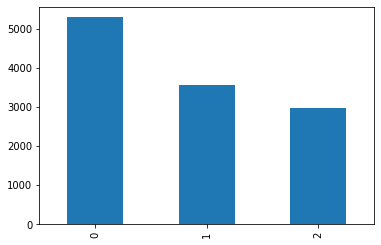

In [7]:
pd.read_csv('ChatbotData.csv')['label'].value_counts().plot(kind = 'bar')

In [8]:
list(text_g)[ : 10]

['하루가 또 가네요.',
 '위로해 드립니다.',
 '여행은 언제나 좋죠.',
 '여행은 언제나 좋죠.',
 '눈살이 찌푸려지죠.',
 '다시 새로 사는 게 마음 편해요.',
 '다시 새로 사는 게 마음 편해요.',
 '잘 모르고 있을 수도 있어요.',
 '시간을 정하고 해보세요.',
 '시간을 정하고 해보세요.']

In [9]:
tokenizer_g = Tokenizer()
tokenizer_g.fit_on_texts(list(text_g))
vocab_size_g = len(tokenizer_g.word_index) + 1
print('단어 집합의 크기 : %d' % vocab_size_g)
print(tokenizer_g.word_index)

단어 집합의 크기 : 9849
{'거예요': 1, '수': 2, '더': 3, '같아요': 4, '좋은': 5, '있어요': 6, '잘': 7, '있을': 8, '많이': 9, '것': 10, '게': 11, '마세요': 12, '해보세요': 13, '건': 14, '수도': 15, '거': 16, '마음이': 17, '좋을': 18, '없어요': 19, '시간이': 20, '그': 21, '바랄게요': 22, '것도': 23, '사람': 24, '안': 25, '될': 26, '다른': 27, '돼요': 28, '좀': 29, '저도': 30, '좋아요': 31, '보세요': 32, '있는': 33, '그런': 34, '하세요': 35, '드세요': 36, '너무': 37, '않아요': 38, '좋죠': 39, '제가': 40, '바랍니다': 41, '그럴': 42, '할': 43, '걸': 44, '말해보세요': 45, '같이': 46, '해요': 47, '생각해요': 48, '사람이': 49, '좋겠어요': 50, '마음을': 51, '먼저': 52, '몰라요': 53, '이제': 54, '하고': 55, '일이': 56, '자신을': 57, '다': 58, '어떨까요': 59, '생각해보세요': 60, '하는': 61, '아니에요': 62, '정말': 63, '좋겠네요': 64, '주세요': 65, '힘든': 66, '다시': 67, '마음': 68, '있으면': 69, '때': 70, '한': 71, '바라요': 72, '그게': 73, '많은': 74, '사랑은': 75, '찾아보세요': 76, '말고': 77, '만큼': 78, '가보세요': 79, '저는': 80, '아직': 81, '괜찮아요': 82, '직접': 83, '좋아하는': 84, '그렇게': 85, '생각을': 86, '때가': 87, '도움이': 88, '충분히': 89, '물어보세요': 90, '있죠': 91, '않을': 92, '시간': 93, '사람은': 94, '쉽지': 9

In [16]:
sequences_g = list()

for line in text_g :
    encoded = tokenizer_g.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)) :
        sequence = encoded[ : i + 1]
        sequences_g.append(sequence)

print('학습에 사용할 샘플의 개수: %d' % len(sequences_g))

print(sequences_g)

학습에 사용할 샘플의 개수: 31851
[[2985, 139], [2985, 139, 1602], [615, 1603], [1321, 223], [1321, 223, 39], [1321, 223], [1321, 223, 39], [2986, 2987], [67, 792], [67, 792, 234], [67, 792, 234, 11], [67, 792, 234, 11, 68], [67, 792, 234, 11, 68, 2988], [67, 792], [67, 792, 234], [67, 792, 234, 11], [67, 792, 234, 11, 68], [67, 792, 234, 11, 68, 2988], [7, 793], [7, 793, 8], [7, 793, 8, 15], [7, 793, 8, 15, 6], [181, 2277], [181, 2277, 13], [181, 2277], [181, 2277, 13], [2989, 2990], [21, 261], [21, 261, 42], [21, 261, 42, 1], [21, 261], [21, 261, 42], [21, 261, 42, 1], [1604, 453], [1605, 67], [1605, 67, 2991], [1605, 67, 2991, 1], [1606, 2992], [480, 1078], [480, 1078, 2993], [480, 1078, 2993, 35], [454, 370], [454, 370, 2994], [454, 370, 2994, 2995], [454, 370, 2994, 2995, 2278], [454, 370], [454, 370, 2994], [454, 370, 2994, 2995], [454, 370, 2994, 2995, 2278], [616, 2996], [616, 2996, 3], [616, 2996, 3, 2997], [617, 147], [616, 2996], [616, 2996, 3], [616, 2996, 3, 2997], [128, 262], [128, 2

In [17]:
max_len_g = max(len(l) for l in sequences_g) 
print('샘플의 최대 길이 : {}'.format(max_len_g))

샘플의 최대 길이 : 21


In [18]:
sequences_g = pad_sequences(sequences_g, maxlen = max_len_g, padding = 'pre')
print(sequences_g)

[[   0    0    0 ...    0 2985  139]
 [   0    0    0 ... 2985  139 1602]
 [   0    0    0 ...    0  615 1603]
 ...
 [   0    0    0 ... 5434 1577  113]
 [   0    0    0 ... 1577  113  258]
 [   0    0    0 ...  113  258   72]]


In [19]:
sequences_g = np.array(sequences_g)
X_chatbot_g = sequences_g[ : , : -1]
y_chatbot_g = sequences_g[ : , -1]

print('X :', X_chatbot_g)
print('y :', y_chatbot_g)
print('전체 y의 개수 :', len(y_chatbot_g))
print('고유값 y의 개수 :', np.unique(y_chatbot_g)[-1] + 1)

X : [[   0    0    0 ...    0    0 2985]
 [   0    0    0 ...    0 2985  139]
 [   0    0    0 ...    0    0  615]
 ...
 [   0    0    0 ...    0 5434 1577]
 [   0    0    0 ... 5434 1577  113]
 [   0    0    0 ... 1577  113  258]]
y : [ 139 1602 1603 ...  113  258   72]
전체 y의 개수 : 31851
고유값 y의 개수 : 9849


In [20]:
y_one_g = to_categorical(y_chatbot_g, num_classes = vocab_size_g)
print("one_hot_vector y :", y_one_g)

one_hot_vector y : [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN, LSTM
embedding_dim = 32
hidden_units = 64

model_g = Sequential()
model_g.add(Embedding(vocab_size_g, embedding_dim))
model_g.add(SimpleRNN(hidden_units))
model_g.add(Dense(vocab_size_g, activation = 'softmax'))
model_g.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_g.fit(X_chatbot_g, y_one_g, epochs = 200, verbose = 2)

Epoch 1/200
996/996 - 26s - loss: 8.0732 - accuracy: 0.0336 - 26s/epoch - 26ms/step
Epoch 2/200
996/996 - 20s - loss: 7.2342 - accuracy: 0.0521 - 20s/epoch - 21ms/step
Epoch 3/200
996/996 - 20s - loss: 6.6695 - accuracy: 0.0735 - 20s/epoch - 20ms/step
Epoch 4/200
996/996 - 19s - loss: 6.0918 - accuracy: 0.1127 - 19s/epoch - 19ms/step
Epoch 5/200
996/996 - 19s - loss: 5.4938 - accuracy: 0.1669 - 19s/epoch - 19ms/step
Epoch 6/200
996/996 - 20s - loss: 4.9186 - accuracy: 0.2242 - 20s/epoch - 20ms/step
Epoch 7/200
996/996 - 19s - loss: 4.3831 - accuracy: 0.2905 - 19s/epoch - 20ms/step
Epoch 8/200
996/996 - 20s - loss: 3.8950 - accuracy: 0.3589 - 20s/epoch - 20ms/step
Epoch 9/200
996/996 - 20s - loss: 3.4513 - accuracy: 0.4217 - 20s/epoch - 20ms/step
Epoch 10/200
996/996 - 20s - loss: 3.0570 - accuracy: 0.4827 - 20s/epoch - 20ms/step
Epoch 11/200
996/996 - 21s - loss: 2.7104 - accuracy: 0.5331 - 21s/epoch - 21ms/step
Epoch 12/200
996/996 - 20s - loss: 2.4087 - accuracy: 0.5797 - 20s/epoch -

In [24]:
def sentence_generation(model, tokenizer, current_word, n) :
    init_word = current_word
    sentence = ''

    for _ in range(n) :

        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen = 5, padding = 'pre')

        result = model.predict(encoded, verbose = 0)
        result = np.argmax(result, axis = 1)

        for word, index in tokenizer.word_index.items() : 
            if index == result :
                break

        current_word = current_word + ' '  + word
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

In [25]:
print(sentence_generation(model_g, tokenizer_g, '너는', 5))

너는 만큼 계속 마주치면서 웃어보세요 되지
